# 1.1 Neural network basics

In this notebook, we construct a basic neural network in PyTorch. We attempt to only provide a bare-bone example for clarity. For another such example, please see [PyTorch's homepage](https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html)

<!--
- [Building the network](#Building-the-network)
- [Training the network](#Training-the-network)
- [Testing the network](#Testing-the-network)
- [Exercises](#Exercises)
-->

First, we import the libraries and load the data. You will explore this further in notebook 1.2.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# We load a training set
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)

# And withhold some data for testing
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 96.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 22.4MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 111MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.03MB/s]


Data loaders are used in machine learning to efficiently load data from a dataset in batches, often performing shuffling and parallel loading.

Using mini-batches is a standard machine learning technique that balances computational efficiency and training stability. It avoids the noisy updates and poor hardware utilization of processing single samples, while also bypassing the prohibitive memory costs and slow progress of using the entire dataset for each update. This compromise generally leads to faster convergence and better model performance by leveraging parallel processing and providing reasonably stable gradient estimates.

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


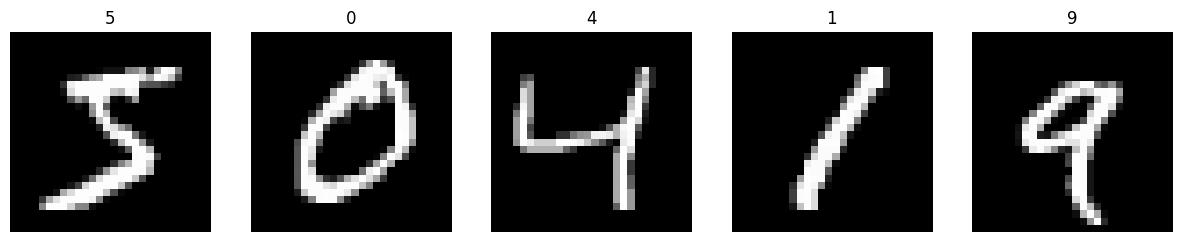

In [5]:
import matplotlib.pyplot as plt
# prompt: Visualize some data

fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    img = train_dataset.data[i]
    print(type(img))
    axes[i].imshow(img, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(train_dataset.targets[i].item())
plt.show()

## Building the network

Below, we construct a fully connected neural network. Here, we will limit ourselves to a single hidden layer, i.e., it's a shallow rather than deep neural network. To construct a neural network in PyTorch, we define a class that inherits from the nn.Module class.

The class contains two functions:

1) init: Defines all the objects we will need.

2) forward: puts all of these objects together, defining the network architecture. Basically, x starts out as your input tensor and is transformed step by step as it passes through each layer of the network. In this notebook, we consider MNIST images as our input tensors. Each image contains 28x28 pixels. The fully connected layers of the neural network, however, can only deal with one-dimensional feature vectors. So, we flatten the tensor, x, which is then passed on to the first fully connected layer, fc1. After the first fully connected layer, a Rectified Linear Unit (ReLU) activation function is applied element-wise to the tensor. The tensor is then passed through the second fully connected layer, fc2. After passing through the second fully connected layer, the transformed x is returned. The final tensor (x) represents the output of the neural network, which can be used for tasks like classification (you can rename x if you don't want to call the input and the output the same or if you want to distinguish between feature extraction and the final classification).

In [6]:
# Define a simple neural network
class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.flatten(start_dim=1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

You can now create an instance of the class.

In [7]:
model = SimpleNet()

## Training the network

We now want to train the weights of the neural network. For this purpose, we first need to define what a good fit to data entails.

In [8]:
criterion = nn.CrossEntropyLoss()

Secondly, we need to decide how we want to optimise the network.

In [9]:
optimizer = optim.Adam(model.parameters(), lr=0.01)

Now, we are ready to train the neural network. Let's train for 5 epochs.
An epoch in machine learning means one complete pass of the training dataset through the algorithm.

Note that fixing the number of epochs in this manner is not a good choice and will lead to under- or overfitting. But in this notebook, we merely want to understand the basic concepts behind training a neural network.

In each epoch, for each batch from the training set, we

1) clear the accumulated gradients of the model parameters (accumulated during backpropagation),

2) perform a forward run (i.e. we predict labels for the batch of images),

3) compute the loss for these predictions,

3) perform backpropagation,

5) and use this to optimise the weights and biases of our model.

In [ ]:
num_epochs = 5

# Training loop
model.train()  # Set the model to training mode
for epoch in range(num_epochs):
    running_loss = 0.0

    for images, labels in train_loader:
        optimizer.zero_grad() # clear gradients
        outputs = model(images) # forward run
        loss = criterion(outputs, labels) # compare to ground truth
        loss.backward() # back propagation
        optimizer.step() # update weights and biases

        running_loss += loss.item()

    # Print average loss for the epoch
    average_loss = running_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {average_loss}')

Epoch [1/5], Loss: 0.43971810603539147
Epoch [2/5], Loss: 0.33904846321145693
Epoch [3/5], Loss: 0.3246502250281473
Epoch [4/5], Loss: 0.3054352718902752
Epoch [5/5], Loss: 0.3056525920684139


## Testing the network

Accuracy of the model on the 10000 test images: 92.27%
------------------------------
Showing 10 random examples:
Example 1:
  Prediction: 3, Ground Truth: 3
Example 2:
  Prediction: 0, Ground Truth: 0
Example 3:
  Prediction: 2, Ground Truth: 2
Example 4:
  Prediction: 1, Ground Truth: 1
Example 5:
  Prediction: 9, Ground Truth: 3
  Result: Incorrect!


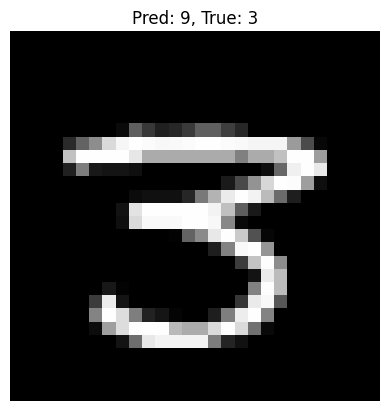

Example 6:
  Prediction: 4, Ground Truth: 4
Example 7:
  Prediction: 4, Ground Truth: 9
  Result: Incorrect!


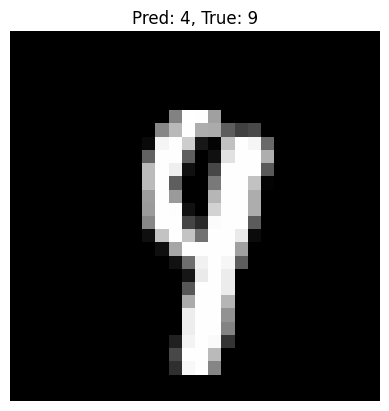

Example 8:
  Prediction: 9, Ground Truth: 9
Example 9:
  Prediction: 5, Ground Truth: 9
  Result: Incorrect!


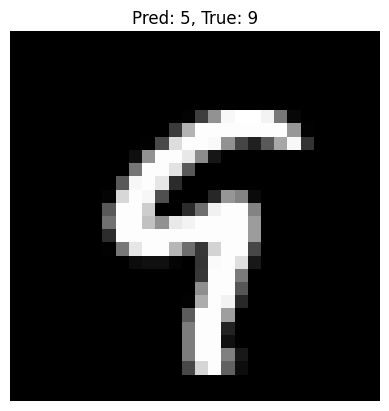

Example 10:
  Prediction: 2, Ground Truth: 2


In [ ]:
import random
model.eval()  # Set the model to evaluation mode (important!)

correct = 0
total = 0
example_images = [] #
max_examples_to_show = 10
i=0
# --- Evaluation Loop ---
with torch.no_grad():  # Disable gradient calculations for efficiency
    for images, labels in test_loader:
        # Get model predictions
        outputs = model(images)

        # Find the predicted class with the highest probability
        _, predicted = torch.max(outputs.data, 1) # Get the index of the max log-probability

        # Update total and correct counts
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


        # Store the image (move to CPU for plotting), prediction, and true label
        img_cpu = images[i]
        pred_label = predicted[i].item()
        true_label = labels[i].item()
        is_correct = (pred_label == true_label)

        example_images.append({
                    "image": img_cpu,
                    "prediction": pred_label,
                    "truth": true_label,
                    "correct": is_correct
                })


# --- Calculate and Print Accuracy ---
accuracy = correct / total if total > 0 else 0 # Avoid division by zero
print(f'Accuracy of the model on the {total} test images: {100 * accuracy:.2f}%')
print("-" * 30)

# --- Show Examples ---
print(f"Showing {max_examples_to_show} random examples:")
#random shuffle examples
random.shuffle(example_images)
#show first 10 examples
for o in range(0,10):
    example = example_images[o]
    print(f"Example {o+1}:")
    print(f"  Prediction: {example['prediction']}, Ground Truth: {example['truth']}")
    if not example['correct']:
        print("  Result: Incorrect!")
        # Display the image for incorrect predictions
        plt.imshow(example['image'].squeeze(), cmap='gray') # Use squeeze() if it's grayscale (Cx1xHxW or 1xHxW) -> HxW
        plt.title(f"Pred: {example['prediction']}, True: {example['truth']}")
        plt.axis('off') # Hide axes
        plt.show()

Having trained the network, we can now test it on unseen data (the test set).

That's a pretty high accuracy, reflecting that the MNIST dataset is relatively simple and well-behaved. Indeed, you can do much better. CNNs can reach an accuracy of more than 99 per cent (see [Kaggle](https://www.kaggle.com/code/cdeotte/how-to-choose-cnn-architecture-mnist)). To achieve such a high accuracy, we need to improve the architecture. We will do so in notebook 2.1.

## Exercises

**Exercise 1**: Here, we use the adam optimiser. Find out what other optimisers are available.

**Exercise 2**: What do the hyperparameters (e.g. lr in adam) mean? Change lr to a higher value (e.g. 1) and rerun the notebook. Or to a lower value. What happens? Why?

**Exercise 3**: Here, we use the cross entropy as the loss function. What is a loss function? And what is the cross entropy?

**Exercise 4**: Change the architecture of the neural network. Add more layers, increase the number of neurons, or try a different activation function.